In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('F:\\Study Material\\BrainTumor\\braindata\\BRAINT_PROJ\\Datasets\\Testing'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0000.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0001.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0002.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0003.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0004.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0005.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0006.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0007.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0008.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-glTr_0009.jpg
F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing\glioma\Te-gl

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join(r'F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r'F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(7023, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

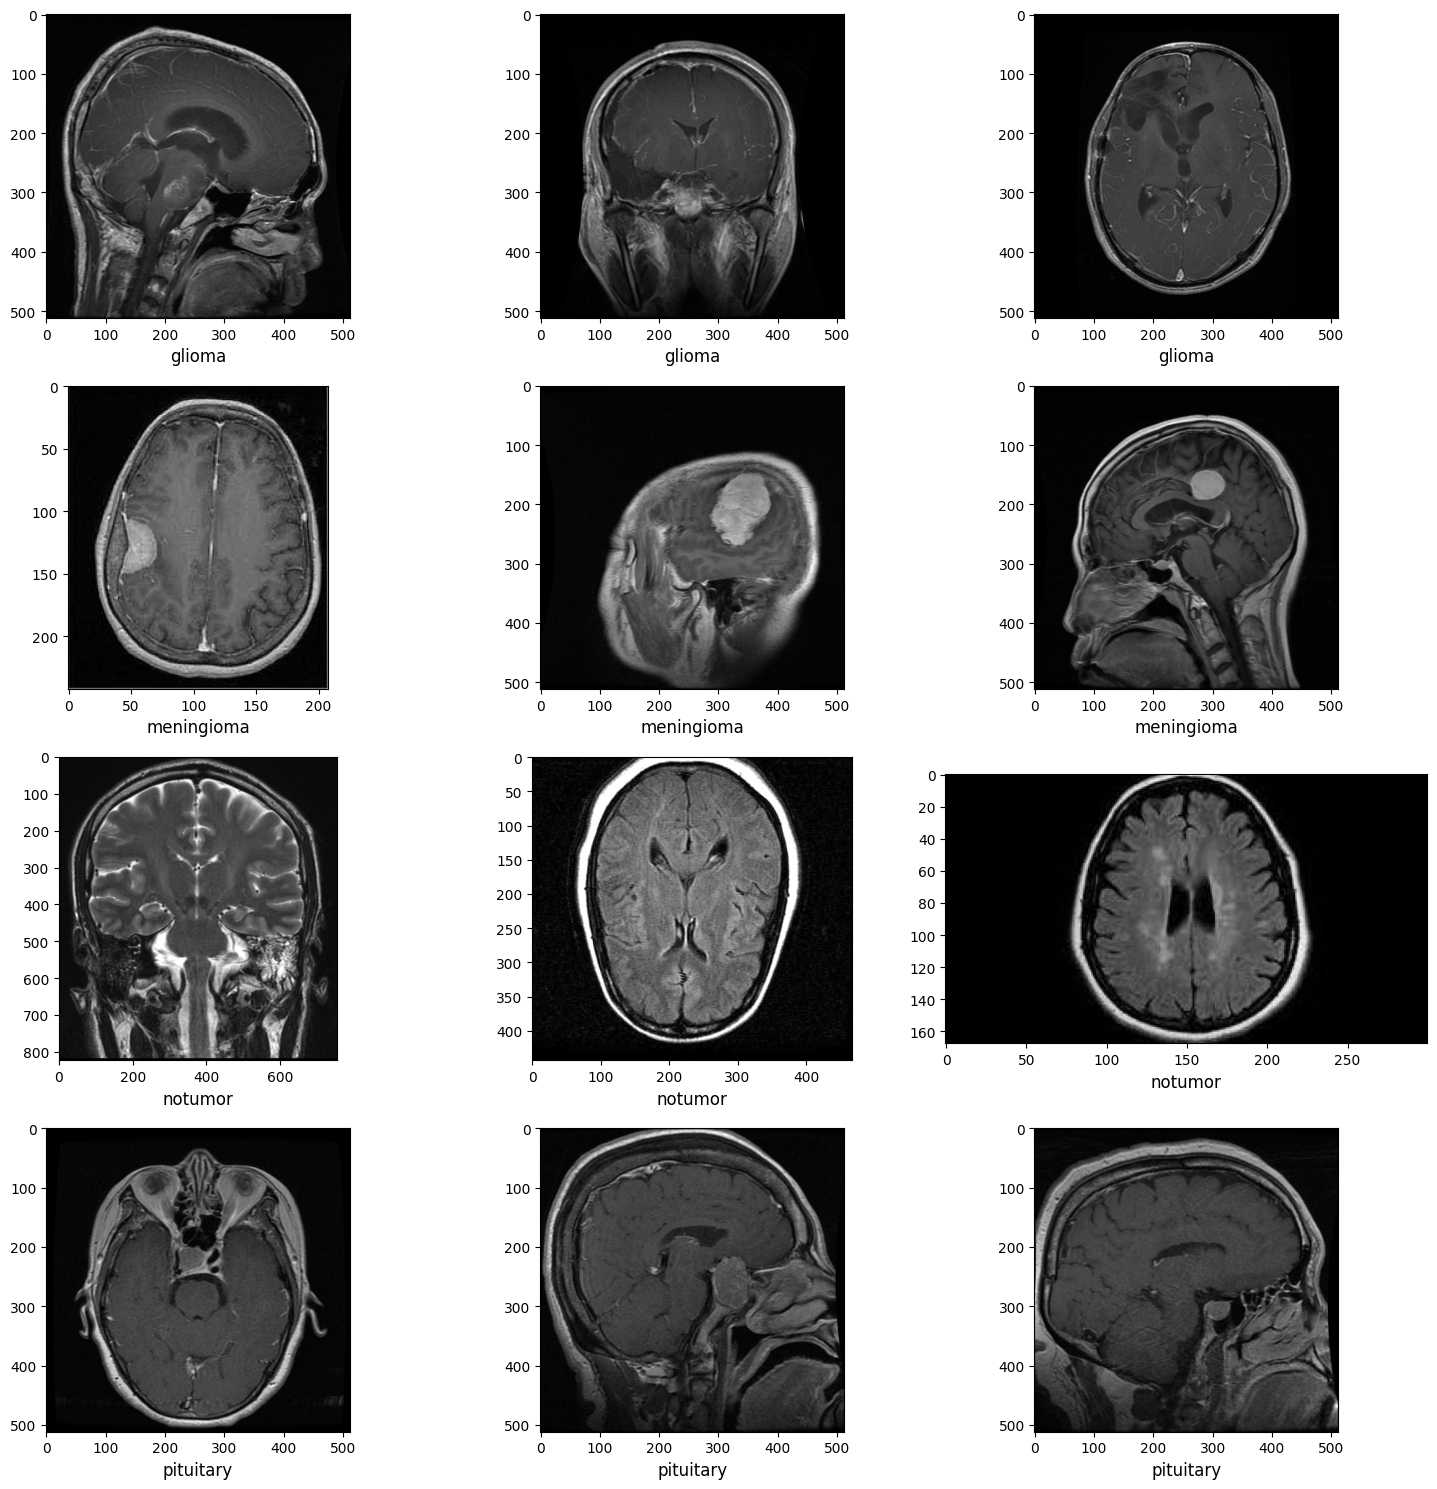

In [20]:

def visualize_images(root_dir, num_images_per_class=3):
    # Define the tumor classes
    tumor_classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

    # Create a figure for plotting
    plt.figure(figsize=(15, 15))

    # Loop through each tumor class
    for i, tumor_class in enumerate(tumor_classes, 1):
        # Get the directory for the current tumor class
        class_dir = os.path.join(root_dir, tumor_class)
        
        # Get a list of image files in the directory
        image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]
        
        # Randomly select num_images_per_class images from the list
        selected_images = random.sample(image_files, min(num_images_per_class, len(image_files)))
        
        # Plot the selected images
        for j, image_file in enumerate(selected_images, 1):
            # Read the image
            image_path = os.path.join(class_dir, image_file)
            img = Image.open(image_path).convert('L')  # Convert to grayscale
            
            # Plot the image
            plt.subplot(len(tumor_classes), num_images_per_class, (i-1)*num_images_per_class + j)
            plt.imshow(img, cmap='gray')  # Specify grayscale colormap
            plt.title('')  # Remove default title
            
            # Add label below the image
            plt.xlabel(tumor_class, fontsize=12)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Path to the root directory containing the tumor images
root_directory = r"F:\Study Material\BrainTumor\braindata\BRAINT_PROJ\Datasets\Training"

# Visualize images from each class
visualize_images(root_directory, num_images_per_class=3)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.2))  
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))  
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,785,188 (6.81 MB)

 Trainable params: 1,785,188 (6.81 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=200,validation_split=0.1)
model.save("BRAINCNNDET.keras")

Epoch 1/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 36s 192ms/step - accuracy: 0.4235 - loss: 5.7689 - val_accuracy: 0.7215 - val_loss: 0.7911
Epoch 2/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.6729 - loss: 0.7648 - val_accuracy: 0.7089 - val_loss: 0.7707
Epoch 3/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.7341 - loss: 0.6598 - val_accuracy: 0.7421 - val_loss: 0.6486
Epoch 4/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 32s 182ms/step - accuracy: 0.7717 - loss: 0.5631 - val_accuracy: 0.7816 - val_loss: 0.5791
Epoch 5/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 33s 187ms/step - accuracy: 0.7954 - loss: 0.4908 - val_accuracy: 0.8006 - val_loss: 0.4939
Epoch 6/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 175ms/step - accuracy: 0.8345 - loss: 0.4379 - val_accuracy: 0.8212 - val_loss: 0.3984
Epoch 7/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - accuracy: 0.8477 - loss: 0.3894 - val_accuracy: 0.8180 - val_loss: 0.4597
Epoch 8/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - accuracy: 0.8672 -

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Overall Training Accuracy: 98.31223487854004
Overall Validation Accuracy: 96.20253443717957


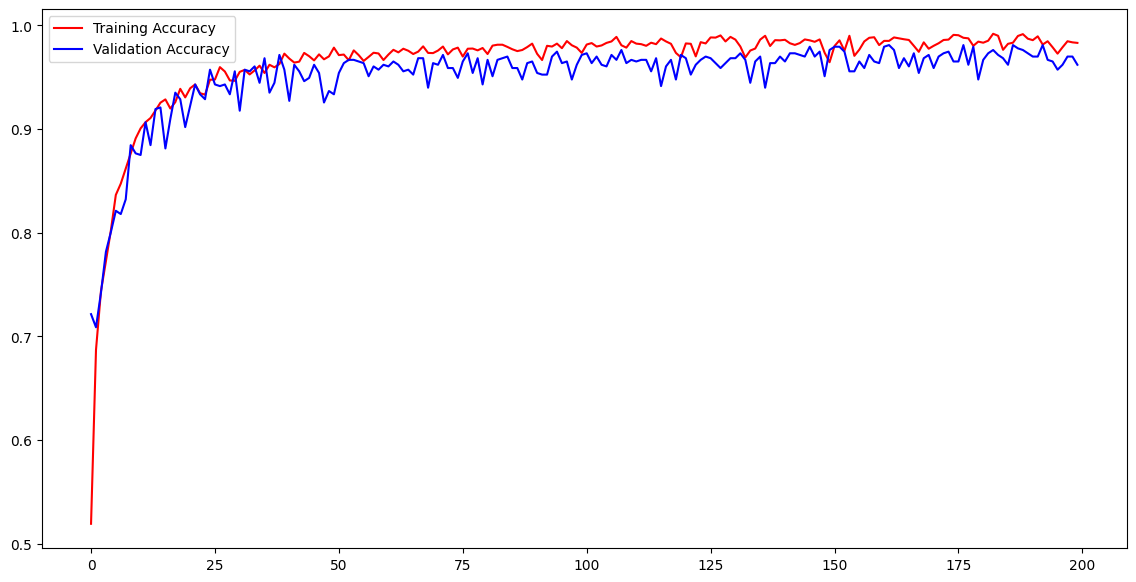

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
overall_training_acc = acc[-1]
overall_validation_acc = val_acc[-1]

print("Overall Training Accuracy:", overall_training_acc*100)
print("Overall Validation Accuracy:", overall_validation_acc*100)
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

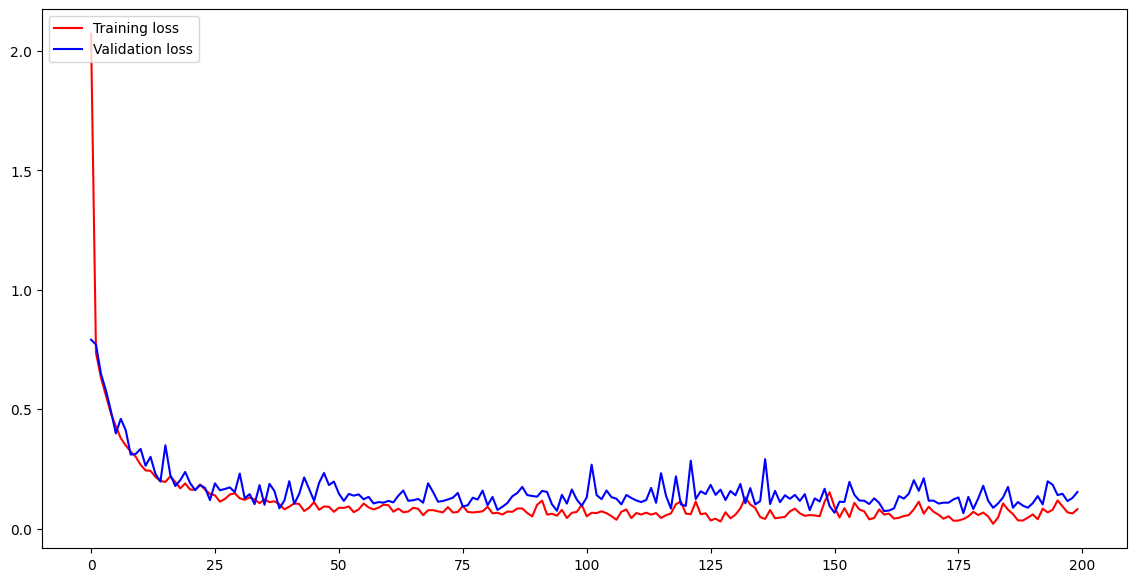

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [6]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
from tensorflow.keras.models import load_model  
model = load_model("BRAINCNNDET.keras")
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    img_array = img_array.reshape(1, 150, 150, 3)
    return img, img_array
def predict_image(model, image_array): 
    prediction = model.predict(image_array)
    indices = prediction.argmax()
    if indices == 0:
        print("Scan Result Positive, tumor detected. Classified as Glioma.")
        return "Scan Result Positive, tumor detected. Classified as Glioma."
    elif indices == 1:
        print("Scan Result Positive, tumor detected. Classified as Meningioma.")
        return "Scan Result Positive, tumor detected. Classified as Meningioma."
    elif indices == 2:
        print("Scan Result Negative,No tumor detected")
        return "Scan Result Negative,No tumor detected."
    elif indices == 3:
        print("Scan Result Positive, tumor detected. Classified as Pituitary.")
        return "Scan Result Positive, tumor detected. Classified as Pituitary."
    else:
        return "Invalid classification index."
def display_image(img):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_pil.thumbnail((2000, 2000))  
    img_tk = ImageTk.PhotoImage(image=img_pil)
    image_label.img = img_tk
    image_label.config(image=img_tk)
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img, img_array = preprocess_image(file_path)
        result = predict_image(model, img_array)  
        display_image(img)  
        result_label.config(text=result) 
root = tk.Tk()
root.title("Brain Tumor Detection")
upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=20)
image_label = tk.Label(root)
image_label.pack()
result_label = tk.Label(root, text="", font=("Helvetica", 14), wraplength=300)
result_label.pack()
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Scan Result Positive, tumor detected. Classified as Glioma.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Scan Result Positive, tumor detected. Classified as Pituitary.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Scan Result Negative,No tumor detected
